In [27]:
import keras
from keras.layers import Dense
from keras import Sequential
from keras import losses
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard, Callback # For tensorboard and custom callbacks

In [28]:
features, labels = load_breast_cancer(return_X_y=True)

In [29]:
features.shape

(569, 30)

In [30]:
pca = PCA()
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

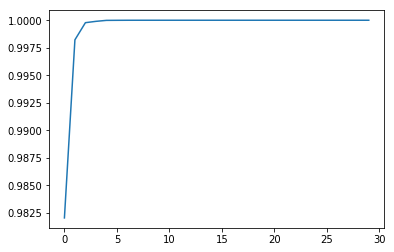

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [32]:
pca = PCA(n_components=10)
features = pca.fit_transform(features)

In [33]:
labels = to_categorical(labels)

In [34]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [35]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=34, shuffle=True)

In [36]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss=losses.categorical_crossentropy, metrics=['acc'])

In [37]:
history = model.fit(features_train, labels_train, epochs=100, validation_data=(features_test, labels_test))

Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 1ms/step - loss: 13.5938 - acc: 0.1080 - val_loss: 13.8862 - val_acc: 0.0769
Epoch 2/100
426/426 [==============================] - 0s 97us/step - loss: 12.6087 - acc: 0.1385 - val_loss: 12.2511 - val_acc: 0.1469
Epoch 3/100
426/426 [==============================] - 0s 87us/step - loss: 6.8353 - acc: 0.3592 - val_loss: 0.3980 - val_acc: 0.8741
Epoch 4/100
426/426 [==============================] - 0s 91us/step - loss: 0.5321 - acc: 0.9225 - val_loss: 0.5269 - val_acc: 0.9441
Epoch 5/100
426/426 [==============================] - 0s 91us/step - loss: 0.6847 - acc: 0.9202 - val_loss: 0.5235 - val_acc: 0.9371
Epoch 6/100
426/426 [==============================] - 0s 93us/step - loss: 0.6257 - acc: 0.9178 - val_loss: 0.4416 - val_acc: 0.9510
Epoch 7/100
426/426 [==============================] - 0s 78us/step - loss: 0.4815 - acc: 0.9225 - val_loss: 0.2955 - val_acc: 0.9510
Epoch 8/100
4

426/426 [==============================] - 0s 87us/step - loss: 0.0936 - acc: 0.9695 - val_loss: 0.0884 - val_acc: 0.9580
Epoch 62/100
426/426 [==============================] - 0s 85us/step - loss: 0.0960 - acc: 0.9624 - val_loss: 0.0894 - val_acc: 0.9580
Epoch 63/100
426/426 [==============================] - 0s 84us/step - loss: 0.0951 - acc: 0.9695 - val_loss: 0.0894 - val_acc: 0.9580
Epoch 64/100
426/426 [==============================] - 0s 81us/step - loss: 0.0945 - acc: 0.9695 - val_loss: 0.0869 - val_acc: 0.9510
Epoch 65/100
426/426 [==============================] - 0s 71us/step - loss: 0.0936 - acc: 0.9695 - val_loss: 0.0845 - val_acc: 0.9580
Epoch 66/100
426/426 [==============================] - 0s 71us/step - loss: 0.1040 - acc: 0.9695 - val_loss: 0.0835 - val_acc: 0.9650
Epoch 67/100
426/426 [==============================] - 0s 76us/step - loss: 0.0971 - acc: 0.9671 - val_loss: 0.0869 - val_acc: 0.9650
Epoch 68/100
426/426 [==============================] - 0s 69us/step

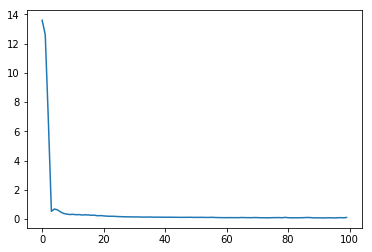

In [38]:
plt.plot(history.history['loss'])

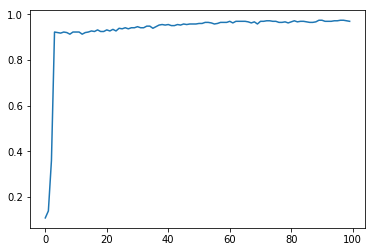

In [39]:
plt.plot(history.history['acc'])

In [40]:
pred = model.predict(features_test)

In [41]:
pred = np.argmax(pred, axis=1)

In [42]:
from sklearn.metrics import accuracy_score


0